('Total records: ', 129971)
('Records with the same title and description: ', 9983)
              points          price
count  119988.000000  111593.000000
mean       88.442236      35.620747
std         3.092915      42.103728
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


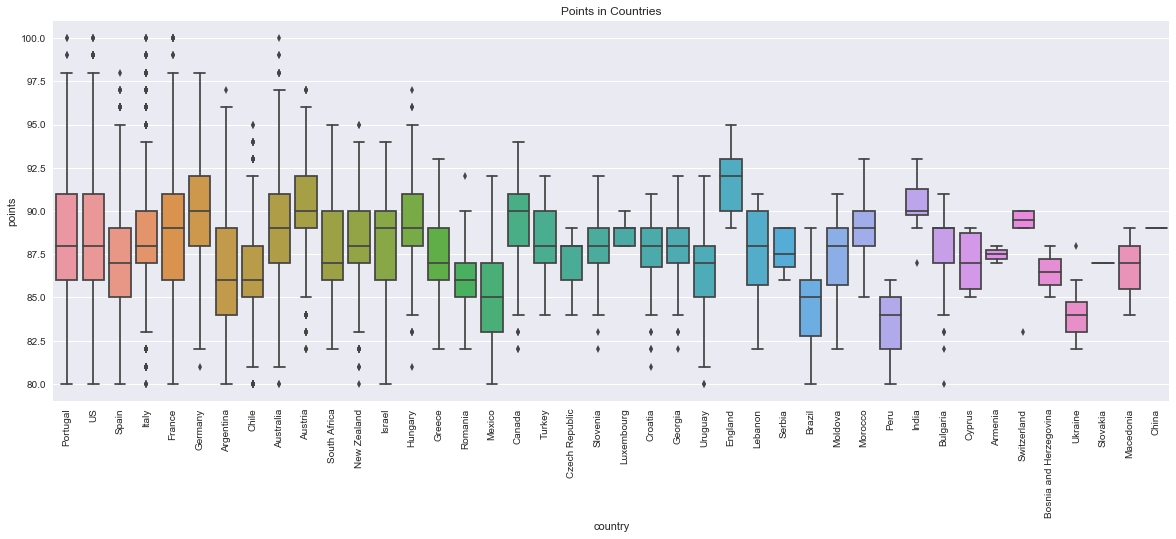

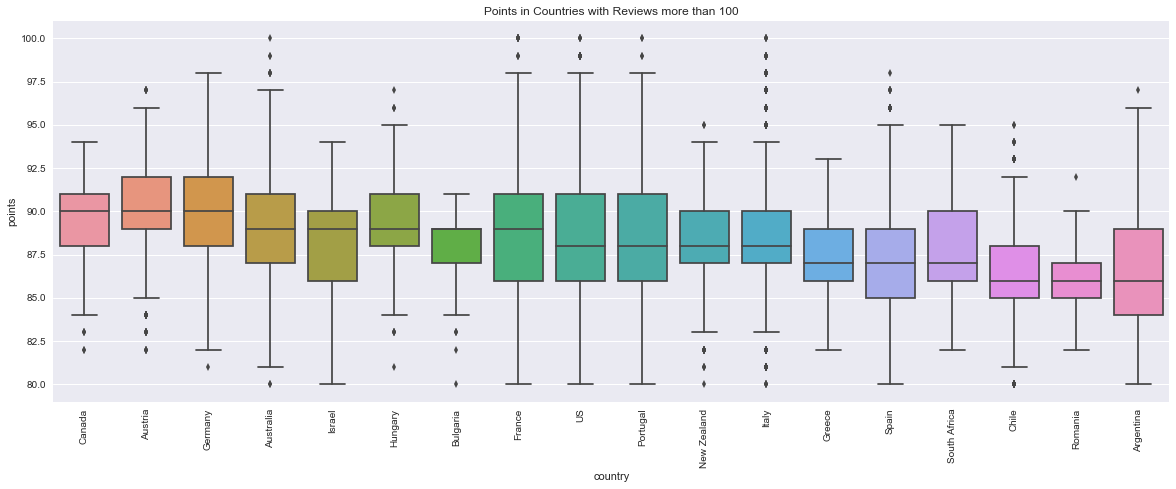

In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv('input_data/winemag-data-130k-v2.csv')

#1. check head()
df1.head()
#2. check type of each factor
df1.dtypes


#4. explore NA
#show numbers.
df1.isnull().sum()
#%matplotlib inline # plot the graph by using the Jupytor
# plot the count of NA in each factor column
#msno.bar(df1)


#5. delete duplicate
print("Total records: ", df1.shape[0])
print("Records with the same title and description: ", df1[df1.duplicated(['description','title'])].shape[0])
#drop duplicates
df1=df1.drop_duplicates(['description','title'])

#3. points/price statistics
df1 = df1.drop(['Unnamed: 0', 'description'],axis=1) # won't use
print df1.describe()

# deal NA
df1 =df1.dropna(subset=['price']) #let price as response variable, delete NA price


# extract year from title
#df1['year'] = df1['title'].str.extract(r'([\d]{4})', expand=True)

#visualizations
# how's points vary in different country,region,
#v2
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=df1, ax = ax).set_title('Points in Countries')
plt.xticks(rotation = 90)
plt.show()

#show top 20 countries with meds
df1.country.value_counts()[:20]

#only display the reviews with more than 100
country=df1.groupby('country').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax).set_title('Points in Countries with Reviews more than 100')
plt.xticks(rotation = 90)
plt.show()
